# MA943 - Numerical Methods

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [ ]:
include("workbook1_functions.jl") 
using Plots
using LaTeXStrings
pyplot()

In [1]:
setprecision(BigFloat, 128)
a_float32 = recursive_fp(Float32); #function that inputs the precision floating point type and returns the sequence
a_float64 = recursive_fp(Float64);
a_bigfloat = recursive_fp(BigFloat);


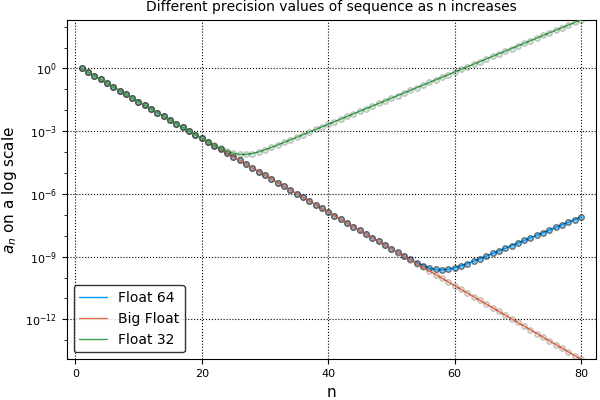

In [28]:
N =1:80

plot(N, a_float64,
    yaxis = :log, 
    xaxis = :none, 
    label = "Float 64", 
    legendfont = font(10), 
    xlabel = "n", 
    m =(0.5), 
    title = "Different precision values of sequence as n increases", 
    titlefont = font(10)
)
plot!(N, a_bigfloat, 
    yaxis = :log, 
    xaxis = :none,
    ylabel = L"$a_n$ on a log scale",
    m =(0.2), 
    label = "Big Float", 
    legendfont = font(10)
)
plot!(N, a_float32,
    yaxis = :log, 
    xaxis = :none, 
    label = "Float 32", 
    legendfont = font(10),
    m =(0.2) 
)

$\textbf{Question 1.3}$:

Consider the recursion $a_{n+1} = 2\ a_n - \frac{8}{9}\ a_{n-1}$ for $n \in \mathbb{N}_{>0}$ with the initial conditions $a_1 = 1 \ \text{and} \ a_2 = \frac{2}{3}$. Then an ansatz to the problem is: $$a_n = \lambda^n.$$ From the initial condition we know immediately that $\lambda \neq 0$. 

Subsituting in the ansatz we achieve $\lambda ^{n+1} = 2 \lambda^n - \frac{8}{9} \lambda^{n-1}$ and since $\lambda \neq 0 \Rightarrow \lambda^2 = 2 \lambda- \frac{8}{9}$. Solving the quadratic equation we find that $$\lambda = \frac{2}{3} \ \text{or} \ \lambda = \frac{4}{3}.$$ 

The general solution $$\left( a_n \right) _{n \in \mathbb{N}_{>0}} = A \left( \frac{2}{3} \right)^n + B \left( \frac{4}{3} \right)^n$$ where $A, B \in \mathbb{R}$ can be found by evaluating the general solution at the inital conditions $a_1 = 1 \ \text{and} \ a_2 = \frac{2}{3}$. 

$\textbf{Question 1.4}$:
Then evaluating the general solution at the initial conditions then, $A= \frac{3}{2} \ \text{and} \ B = 0 $. Then the solution to the recursive problem is $$\ \left( a_n \right) _{n \in \mathbb{N}_{<0}}=\frac{3}{2} \left( \frac{2}{3} \right)^n $$

However this implies that the $\lim_{n \rightarrow \infty}(a_n) = 0$ which cannot be observed from the numerical results. The numerical results demonstrated above have a turning point at which the sequence starts increasing. 

$\textbf{Question 1.5}$:

We now consider a pertubation of the initial conditions to explain the numerical results. Let $a_1 = 1$ and $a_2 = \frac{2}{3} + \epsilon$ where $\epsilon$ is loss of significance. Then the constants $A = \frac{6-9 \epsilon}{4} \ \text{and} \ B = \frac{9 \epsilon}{8}$ giving a solution of
 $$\left( a_n \right) _{n \in \mathbb{N}_{<0}} = \frac{6-9 \epsilon}{4} \left( \frac{2}{3} \right)^n + \frac{9 \epsilon}{8} \left( \frac{4}{3} \right)^n$$
This takes into account the dynamical instabilities as every operation commits an error of at least $\epsilon$, then the recursion problem will accumulate errors with each step. Then as $B$ is small for $\epsilon$ small, then this term will not become significant until $n \rightarrow \infty$. The solution $a_n$ will exponentially grow as $n$ increases (since $\frac{4}{3}>1$, then $B$ will eventually dominate).

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [8]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [9]:
#part 1, verify that mergepresorted(a::Arrary{Int64,1}, b::Array{Int64,1}) works
m = rand(1:100) #random length m
n = rand(1:100) #random length n
a = sort(rand(1:100, m)) #sorted vector length m
b = sort(rand(1:100, n)) #sorted vector length n

mergepresorted(a,b);#vector of length n+m

In [11]:
#verify that sortarray (our recursive function) works
k = 64 # list of length 2^n
y = rand(1:100, k)

sortarray(y);

$\textbf{Question 2.3}$:

If $F(n)$ is the computational complexity then we can see from the code that:
1. For an array A of length(A)=1 then the sorted array is returned immediately, that is $F(1) = 1$.
2. For an array A of length(A)=n then we run the recursive relation twice on two smaller arrays of length $\frac{n}{2}$ then the computational complexity is $F(n) = 2 F( \frac{n}{2}) + \frac{n}{2} + \frac{n}{2} =   2 F( \frac{n}{2}) + n$. Here we also take into account that the computational complexity of mergepresorted is $n$.

$\textbf{Question 2.4}$:

From above we know the computational complexity of the mergesort algorithm is $$F(n) = 2 F(\frac{n}{2}) +n$$ Then consider the subsitution $n = 2^p, \ b_p = F(2^p)$ then, $$b_0 = F(2^0) = 1 \ \text{and} \ b_p = 2 b_{p-1} +2^p$$

$\textbf{Question 2.5}$:

Consider the homogenous equation $b_p = 2 b_{p-1}$, then a suitable ansatz is $b_p = A \lambda ^p$ where $A \in \mathbb{R}$. Then from the initial condition $b_0 = 1$ we know that $\lambda \neq 0$. Then subsituting this ansatz into the homogenous equation we achieve that $\lambda = 2$ and the complementary solution is given by, $b_p = A \left( 2 \right) ^n.$

$\textbf{Question 2.6}$:

Then for the inhomogenous equation $b_p = 2b_{p-1}+ 2^p$ consider the particular solution $b_p = Bp 2^p + C$ for $B, C \in \mathbb{R}$

Then we for solving for the constants $B \ \text{and} \ C$ we achieve $B=1 \ \text{and} \ C=0$. Then the general solution for the computational complexity is given by $b_p = p 2^p + A 2^p$ and to satisfy the initial condition we achieve $b_0 = A = 1$ and therefore the solution is, $$b_p = 2^p (p+1)$$  Changing back to the orginal variables we achieve $$F(n) =n(p+1)$$ Then as $n =2^p \Rightarrow p = \frac{\log(n)}{\log(2)}$ we get, $$ F(n) = n \left( \frac{\log(n)}{\log(2)} +1 \right) \sim \mathcal{O}(n \log(n))  $$  

In [20]:
lengths = zeros(15)
for j =1:15 #lengths of size 2^n
    lengths[j] = 2^j
end

times = zeros(15)
theortime = zeros(15)
for k = 1:15
    elem = rand(1:Int(lengths[k]), Int(lengths[k]))
    times[k] = (@timed sortarray(elem))[2] #returns the time to compute the function sortarray
    theortime[k] = (lengths[k]*log(lengths[k])) + lengths[k]
end
theortime = times[1]*theortime; #scale all the times by the initial time


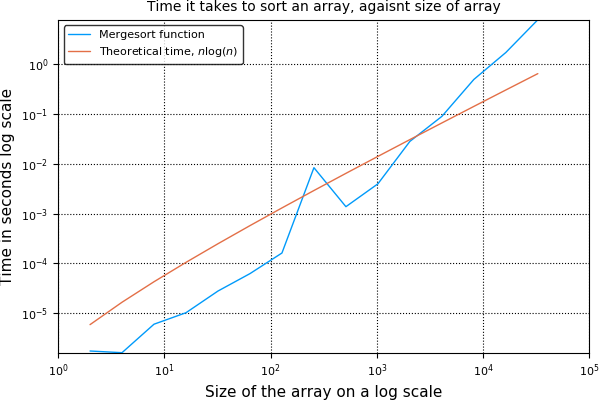

In [30]:
plot(lengths, times, 
    label = "Mergesort function", 
    xlabel = "Size of the array on a log scale",
    ylabel = "Time in seconds log scale",
    yaxis = :log, 
    xaxis = :log 
)
plot!(lengths, theortime, 
    label = L"Theoretical time, $n \log(n)$", 
    title = "Time it takes to sort an array, agaisnt size of array", 
    titlefont = font(10), 
    yaxis = :log, 
    xaxis = :log
)